In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist 1,$57K-$94K (Glassdoor est.),"At NGL, we strive to make data-driven decision...",3.0,National Guardian Life Insurance Company\n3.0,"Madison, WI",-1,201 to 500 Employees,1909,Company - Private,...,75.5,National Guardian Life Insurance Company\n,WI,0,111,0,0,1,1,1
1,"Data Scientist, Growth",$57K-$94K (Glassdoor est.),Have you ever wondered what happens inside the...,4.3,DigitalOcean\n4.3,"New York, NY",-1,501 to 1000 Employees,2012,Company - Private,...,75.5,DigitalOcean\n,NY,0,8,1,0,1,1,1
2,Data Scientist,$57K-$94K (Glassdoor est.),Data Scientists develop and apply methods to i...,3.9,National Geospatial-Intelligence Agency\n3.9,"Springfield, VA",-1,10000+ Employees,1996,Government,...,75.5,National Geospatial-Intelligence Agency\n,VA,0,24,1,0,1,1,1
3,Senior Data Scientist Virtual Hiring Event,$57K-$94K (Glassdoor est.),The Zebra Hiring Event // Senior Data Scientis...,4.0,The Zebra\n4.0,"Austin, TX",-1,51 to 200 Employees,2012,Company - Private,...,75.5,The Zebra\n,TX,0,8,1,0,1,1,1
4,Data Scientist,$57K-$94K (Glassdoor est.),"Publishers Clearing House (PCH), located in Je...",3.3,Publishers Clearing House\n3.3,"Jericho, NY",-1,501 to 1000 Employees,1953,Company - Private,...,75.5,Publishers Clearing House\n,NY,0,67,1,0,1,1,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer'in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    269
analyst            88
data engineer      59
na                 52
mle                25
manager             6
director            1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        415
senior     85
Name: seniority, dtype: int64

In [9]:
### Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2432
1       5414
2       9530
3       4063
4       2939
       ...  
495     4087
496     1070
497    10359
498     2629
499     1583
Name: desc_len, Length: 500, dtype: int64

In [10]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,57,94
1,0,57,94
2,0,57,94
3,0,57,94
4,0,57,94
...,...,...,...
495,0,111,177
496,0,111,177
497,0,111,177
498,0,111,177


In [11]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis = 1)
df[['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,57,94
1,0,57,94
2,0,57,94
3,0,57,94
4,0,57,94
...,...,...,...
495,0,111,177
496,0,111,177
497,0,111,177
498,0,111,177


In [12]:
#remove new job

df.company_txt

0      National Guardian Life Insurance Company\n
1                                  DigitalOcean\n
2       National Geospatial-Intelligence Agency\n
3                                     The Zebra\n
4                     Publishers Clearing House\n
                          ...                    
495                         Benefits Data Trust\n
496                           The Buffalo Group\n
497                                 Neighborly®\n
498                                     Group O\n
499                                     TransRe\n
Name: company_txt, Length: 500, dtype: object

In [13]:
df['company_txt']=df.company_txt.apply(lambda x: x.replace('\n',''))

In [14]:
df['company_txt']

0      National Guardian Life Insurance Company
1                                  DigitalOcean
2       National Geospatial-Intelligence Agency
3                                     The Zebra
4                     Publishers Clearing House
                         ...                   
495                         Benefits Data Trust
496                           The Buffalo Group
497                                 Neighborly®
498                                     Group O
499                                     TransRe
Name: company_txt, Length: 500, dtype: object

In [15]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len
count,500.000000,500.0,500.000000,500.0,500.0,500.0,500.00000,500.000000,500.000000,500.0,500.00000,500.000000,500.000000,500.0,500.0,500.0,500.000000
mean,3.694800,-1.0,1783.048000,-1.0,0.0,0.0,80.11200,127.266000,103.689000,0.0,30.70800,0.694000,0.012000,1.0,1.0,1.0,3610.908000
std,1.010512,0.0,602.773704,0.0,0.0,0.0,22.34731,25.975849,23.517013,0.0,34.67361,0.461291,0.108994,0.0,0.0,0.0,1451.812763
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,56.00000,94.000000,75.500000,0.0,-1.00000,0.000000,0.000000,1.0,1.0,1.0,679.000000
25%,3.400000,-1.0,1958.000000,-1.0,0.0,0.0,63.00000,104.000000,82.500000,0.0,8.00000,0.000000,0.000000,1.0,1.0,1.0,2618.500000
50%,3.800000,-1.0,1996.000000,-1.0,0.0,0.0,77.00000,126.500000,102.250000,0.0,18.00000,1.000000,0.000000,1.0,1.0,1.0,3477.500000
75%,4.200000,-1.0,2008.250000,-1.0,0.0,0.0,87.00000,140.000000,112.000000,0.0,46.25000,1.000000,0.000000,1.0,1.0,1.0,4411.250000
max,5.000000,-1.0,2019.000000,-1.0,0.0,0.0,146.00000,177.000000,160.500000,0.0,233.00000,1.000000,1.000000,1.0,1.0,1.0,10359.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

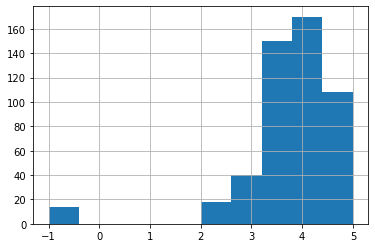

In [17]:
df.Rating.hist()

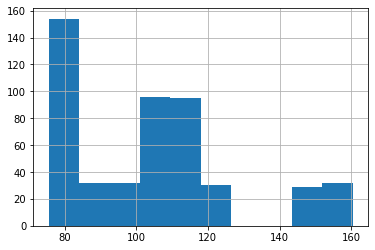

In [18]:
df.avg_salary.hist()

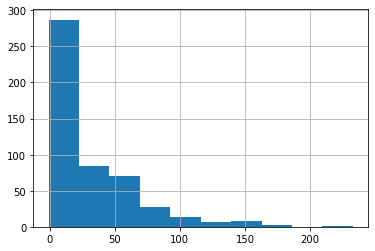

In [19]:
df.age.hist()

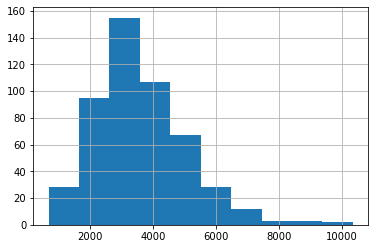

In [20]:
df.desc_len.hist()

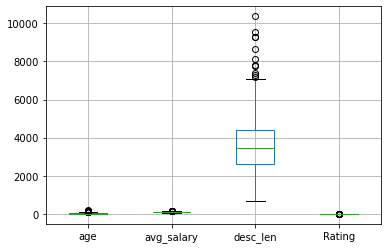

In [21]:
df.boxplot(column = ['age','avg_salary','desc_len','Rating'])

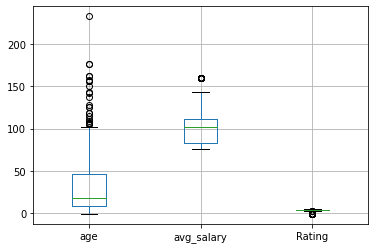

In [22]:
df.boxplot(column = ['age','avg_salary', 'Rating'])

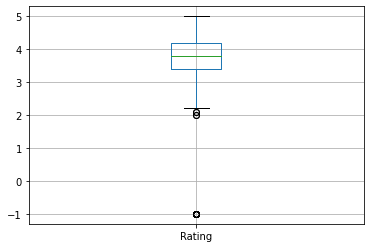

In [23]:
df.boxplot(column = 'Rating')

In [24]:
#correlations

In [25]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.005384,0.030733,0.094422
avg_salary,-0.005384,1.000000,0.006762,-0.033111
Rating,0.030733,0.006762,1.000000,-0.043010
desc_len,0.094422,-0.033111,-0.043010,1.000000


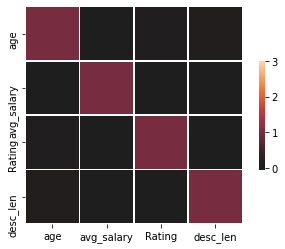

In [26]:
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=3, center=0,square=True, linewidths=.5,cbar_kws={'shrink': .5})

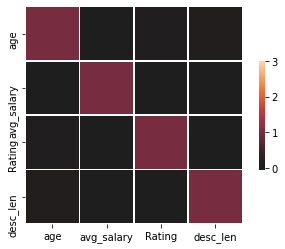

In [27]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=3, center=0,square=True, linewidths=.5,cbar_kws={'shrink': .5})

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [29]:
df_cat = df[['Location','Headquarters', 'Size', 'Type of ownership','Industry','Sector','Revenue','job_state','same_state','spark','aws','excel','job_simp','seniority','company_txt']]

graph for Location: total = 180


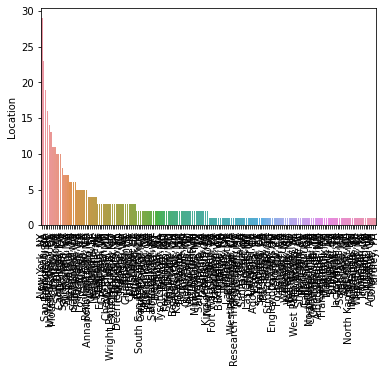

graph for Headquarters: total = 1


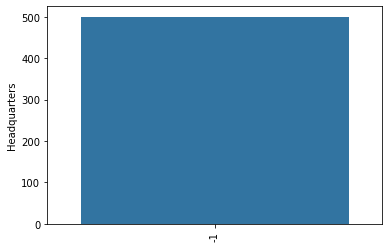

graph for Size: total = 9


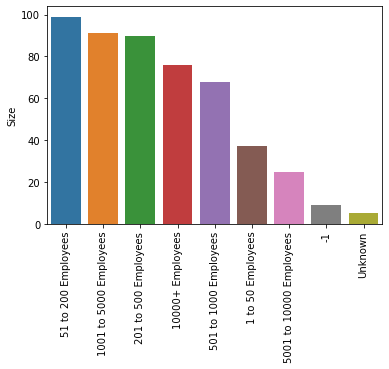

graph for Type of ownership: total = 11


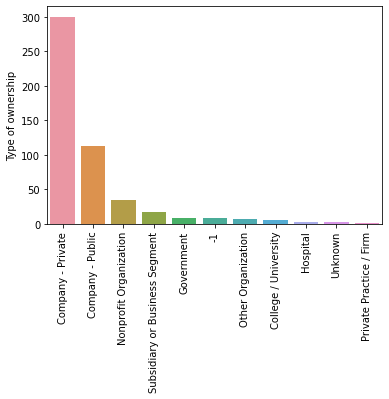

graph for Industry: total = 59


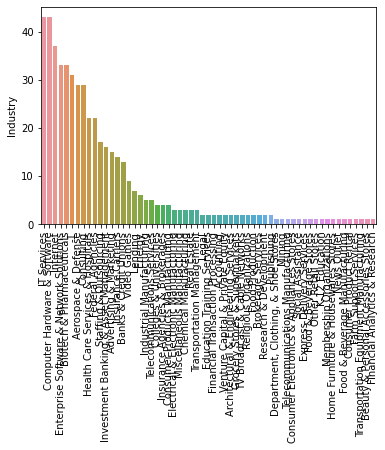

graph for Sector: total = 22


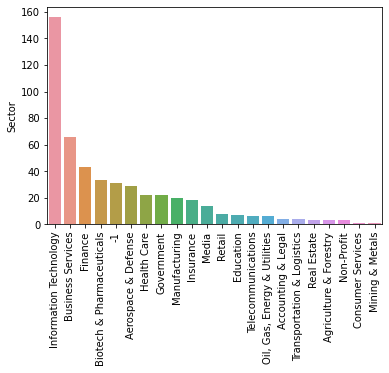

graph for Revenue: total = 14


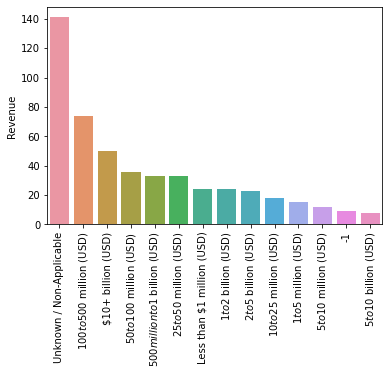

graph for job_state: total = 39


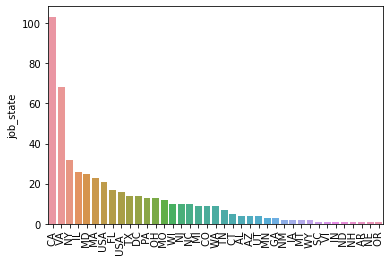

graph for same_state: total = 1


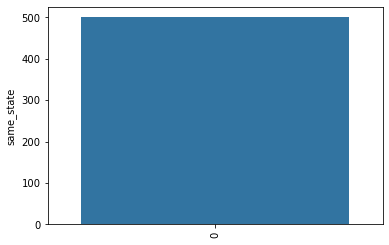

graph for spark: total = 1


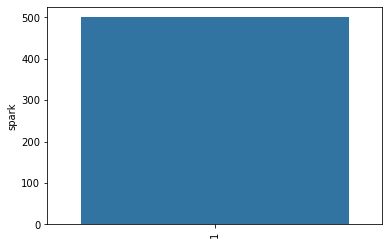

graph for aws: total = 1


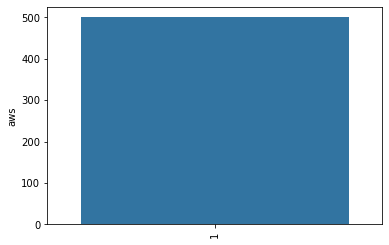

graph for excel: total = 1


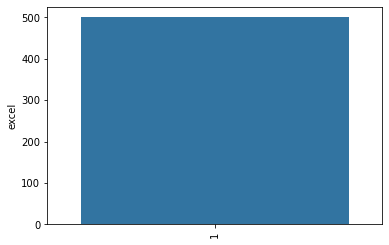

graph for job_simp: total = 7


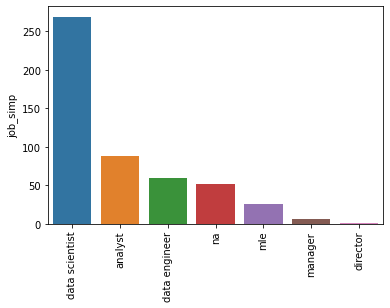

graph for seniority: total = 2


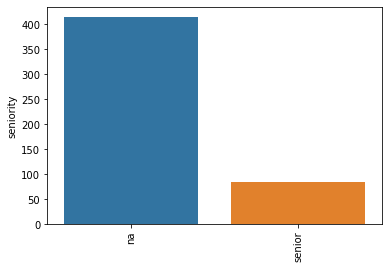

graph for company_txt: total = 351


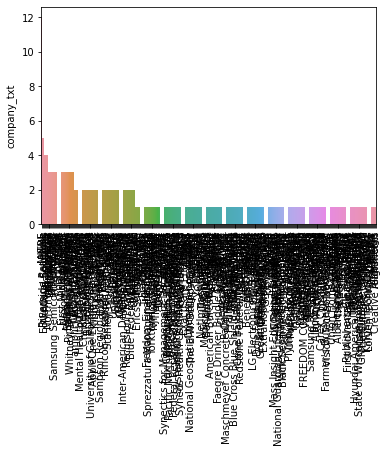

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


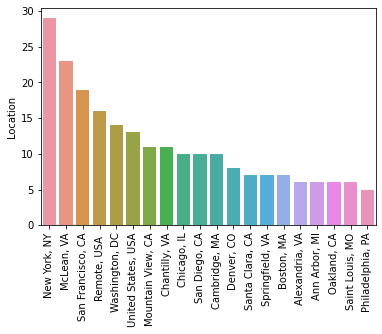

graph for Headquarters: total = 1


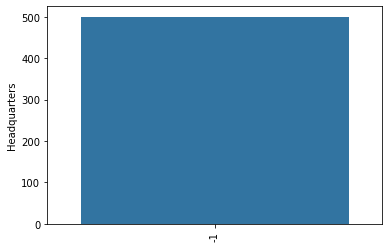

graph for company_txt: total = 20


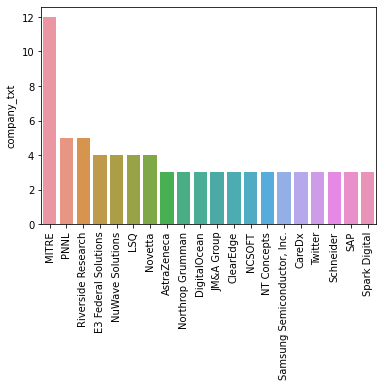

In [31]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num =  df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [33]:
pd.pivot_table(df, index= 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,108.750000
data engineer,105.576271
data scientist,99.304833
director,80.500000
manager,125.666667
mle,117.620000
na,106.875000


In [34]:
pd.pivot_table(df, index= ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na         107.815068
               senior     113.300000
data engineer  na         103.610000
               senior     116.500000
data scientist na          99.084091
               senior     100.295918
director       na          80.500000
manager        na         118.700000
               senior     160.500000
mle            na         118.636364
               senior     110.166667
na             na         105.625000
               senior     113.750000

In [35]:
pd.pivot_table(df, index= 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
WY,120.500000
AZ,119.125000
TN,114.928571
OH,114.538462
OR,114.500000
AL,113.250000
CO,113.111111
USA,109.656250
NJ,108.600000


In [36]:
pd.pivot_table(df, index= ['job_state','job_simp'], values = 'avg_salary').sort_values('avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
 AL       data scientist  103.000000
          analyst         144.000000
 AR       data scientist  100.500000
 AZ       analyst         132.000000
          na               80.500000
...                              ...
 WA       data scientist  105.187500
 WI       analyst          88.166667
          data scientist   88.750000
          na               95.666667
 WY       analyst         120.500000

[106 rows x 1 columns]

In [37]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [38]:
pd.pivot_table(df, index= ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary').sort_values('job_state')

avg_salary
job_state job_simp                  
 AL       analyst                  1
          data scientist           3
 AR       data scientist           1
 AZ       analyst                  3
          na                       1
 CA       analyst                 10
          mle                     10
          na                       8
          data engineer            7
          manager                  1
          data scientist          67
 CO       analyst                  3
          mle                      2
          data scientist           3
          na                       1
 CT       data scientist           4
          analyst                  1
 DC       data engineer            1
          analyst                  2
          na                       2
          data scientist           9
 FL       data scientist           5
          na                       4
          manager                  1
          analyst                  7
 GA       analyst                  1
          data scientist           1
          mle                      1
 IA       analyst                  1
          data engineer            1
 IL       analyst                  8
          data scientist          12
          na                       3
          data engineer            3
 IN       data scientist           1
 MA       mle                      4
          data scientist          17
          data engineer            1
          na                       1
 MD       data engineer            2
          na                       4
          analyst                  6
          data scientist          13
 MI       data engineer            6
          mle                      2
          na                       1
 MN       director                 1
          data scientist           2
 MO       data scientist           6
          data engineer            4
          analyst                  2
 MT       na                       2
 NC       analyst                  2
          data scientist           3
          na                       4
          data engineer            1
 ND       analyst                  1
 NE       na                       1
 NH       analyst                  1
 NJ       analyst                  4
          manager                  1
          data scientist           4
          na                       1
 NM       data scientist           2
 NY       manager                  1
          data scientist          23
          data engineer            3
          analyst                  3
          mle                      2
 OH       analyst                  3
          data scientist           5
          na                       5
 OR       data scientist           1
 PA       na                       1
          analyst                  6
          data engineer            3
          data scientist           3
 SC       analyst                  1
 TN       analyst                  3
          data scientist           3
          na                       1
 TX       data scientist           7
          data engineer            5
          manager                  1
          analyst                  1
 USA      mle                      2
          data engineer           10
          analyst                  1
          data scientist           5
          na                       3
 USA      data scientist           9
          analyst                  3
          data engineer            4
 UT       data scientist           4
 VA       data scientist          44
          analyst                  9
          data engineer            7
          na                       6
          mle                      2
 VI       manager                  1
 WA       data scientist           8
          data engineer            1
 WI       na                       3
          data scientist           4
          analyst                  3
 WY       analyst                  2

In [39]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index= ['job_state','job_simp'], values = 'avg_salary').sort_values('avg_salary')

,,avg_salary
job_state,job_simp,
GA,data scientist,75.500000
IN,data scientist,77.000000
MN,data scientist,79.000000
CO,data scientist,87.166667
TX,data scientist,87.428571
WI,data scientist,88.750000
DC,data scientist,90.277778
MO,data scientist,91.833333
NM,data scientist,92.500000


In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [41]:
#rating, industry, sector, revenue, number of comp, hourly, employer providid, python, r, sark, aws, excel, desc_len,

df_pivots= df[['Rating','Industry','Sector','Revenue','hourly','employer_provided','python_yn','R_yn','spark','aws','excel','desc_len','avg_salary']]

In [42]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = "avg_salary").sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.5    123.416667
 4.6    121.058824
 3.4    112.192308
 4.1    107.860000
-1.0    107.142857
 4.4    107.000000
 3.9    106.639535
 4.7    106.600000
 2.1    106.500000
 3.6    105.296296
 4.9    104.833333
 3.3    103.964286
 4.0    103.314286
 3.8    102.764706
 5.0    102.521739
 3.5    102.125000
 4.2    101.809524
 2.9    101.350000
 3.7    100.320000
 4.3     97.916667
 3.1     97.357143
 2.8     96.666667
 3.2     96.458333
 4.8     96.055556
 4.5     95.354167
 2.2     95.200000
 2.7     93.750000
 3.0     93.333333
 2.6     92.666667
 2.0     91.500000
 2.4     89.000000
Industry
                                          avg_salary
Industry                                            
Consumer Electronics & Appliances Stores  160.500000
Social Assistance                         144.000000
Farm Support Services                     144.000000
Telecommunications Manufacturing          126.000000
News Outlet                            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:

words = ' '.join(df['Job Description'])

def punctuation_stop(text):
    """remove puncuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = ' '.join([ele for ele in words_filtered])

wc = WordCloud(background_color = white, random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="billinear")
plt.axis('off')
plt.show()
    

In [43]:
df.to_csv("/Users/benlewis/Documents/ds_salary_proj/eda_data.csv", index=False)

In [ ]:
spyder